<a href="https://colab.research.google.com/github/Khan-solo/Support_Vector_Regression/blob/main/Support_Vector_Regressoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#Importing the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Machine learning/Support Vector Regression/Position_Salaries.csv")
np.set_printoptions(precision= 2)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [54]:
#Getting Matrix of features and dependent variable
X = np.array(dataset.iloc[:, 1:-1])
y = np.array(dataset.iloc[:, -1])
y=y.reshape(len(y), 1)


In [53]:
#Feature scaling: (hella important, otherwise SVR wont work)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scy = StandardScaler()
X = sc.fit_transform(X)
y = scy.fit_transform(y)

In [49]:
print(X)

[[-1.57]
 [-1.22]
 [-0.87]
 [-0.52]
 [-0.17]
 [ 0.17]
 [ 0.52]
 [ 0.87]
 [ 1.22]
 [ 1.57]]


In [52]:
print(y)

[[-0.72]
 [-0.7 ]
 [-0.67]
 [-0.6 ]
 [-0.49]
 [-0.35]
 [-0.17]
 [ 0.18]
 [ 0.88]
 [ 2.64]]


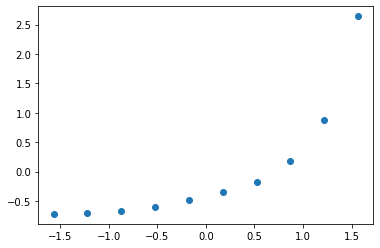

In [48]:
#visualising the scaled data. 
plt.scatter(X, y)
plt.show()

#Training the SVR model on the whole dataset

In [58]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
y = y.reshape(1, len(y))
regressor.fit(X,y)

ValueError: ignored